In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import scipy as sp
from sklearn import preprocessing
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from skimage.filters import sobel

%matplotlib inline


NUM_FRAME = 226
IM_LENGTH = 640
IM_HEIGHT = 480

In [2]:
hd_cam1_mat = np.asarray(sio.loadmat('cam1_3')['vidFrames1_3'])
hd_cam2_mat = np.asarray(sio.loadmat('cam2_3')['vidFrames2_3'])
hd_cam3_mat = np.asarray(sio.loadmat('cam3_3')['vidFrames3_3'])

# A: Animation

#### Cam1 Animation

Wall time: 13.3 s


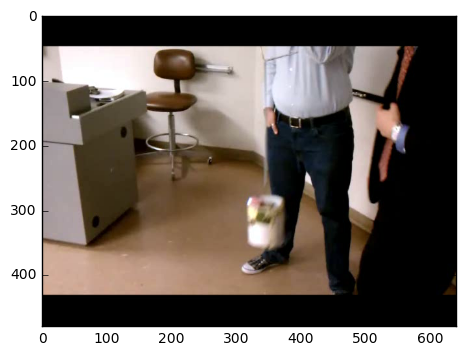

In [5]:
%%time
# First set up the figure
fig5 = plt.figure()

im_hd_cam1=plt.imshow(hd_cam1_mat[:,:,:,0])

# animation function.  This is called sequentially
def animate_hd_cam1(i):
    curr_frame = im_hd_cam1.set_data(hd_cam1_mat[:,:,:,i])
    return curr_frame
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim_hd_cam1 = animation.FuncAnimation(fig5, animate_hd_cam1, frames=NUM_FRAME, interval=20)

anim_hd_cam1.save('hd_cam1.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [6]:
HTML(anim_hd_cam1.to_html5_video())

#### Cam2 Animation

Wall time: 13.5 s


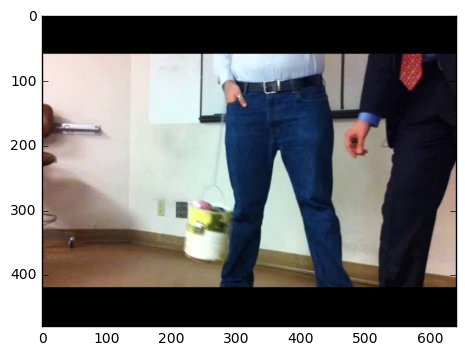

In [7]:
%%time
# First set up the figure
fig2 = plt.figure()

im_hd_cam2=plt.imshow(hd_cam2_mat[:,:,:,0])

# animation function.  This is called sequentially
def animate_hd_cam2(i):
    curr_frame = im_hd_cam2.set_data(hd_cam2_mat[:,:,:,i])
    return curr_frame
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim_hd_cam2 = animation.FuncAnimation(fig2, animate_hd_cam2, frames=NUM_FRAME, interval=20)

anim_hd_cam2.save('hd_cam2.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [8]:
HTML(anim_hd_cam2.to_html5_video())

#### Cam3 Animation

Wall time: 13.4 s


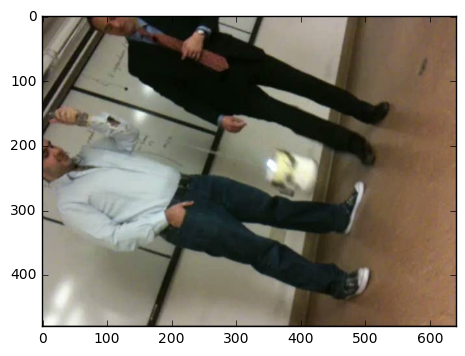

In [9]:
%%time
# First set up the figure
fig3 = plt.figure()

im_hd_cam3=plt.imshow(hd_cam3_mat[:,:,:,0])

# animation function.  This is called sequentially
def animate_hd_cam3(i):
    curr_frame = im_hd_cam3.set_data(hd_cam3_mat[:,:,:,i])
    return curr_frame
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim_hd_cam3 = animation.FuncAnimation(fig3, animate_hd_cam3, frames=NUM_FRAME, interval=20)

anim_hd_cam3.save('hd_cam3.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [10]:
HTML(anim_hd_cam3.to_html5_video())

# B: Boxing

## Method 2

### 2a) Cam1 Only

In [11]:
%%time
hd_cam1_matrix2 = [] 

col_curr = np.zeros((IM_LENGTH*IM_HEIGHT,1))
for i in range (0,NUM_FRAME):
    col_curr = hd_cam1_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 

    hd_cam1_matrix2.append(col_curr)

hd_cam1_matrix2 = np.transpose(np.asarray(hd_cam1_matrix2).squeeze())

hd_cam1_matrix2_scaled = preprocessing.scale(hd_cam1_matrix2) 

U_cam1_p32,Lamda_cam1_p32,V_s_cam1_p32 = sp.sparse.linalg.svds(hd_cam1_matrix2_scaled,k=100)

print(hd_cam1_matrix2.shape) 

C:\Users\Zhaokai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(307200, 226)
Wall time: 18.8 s


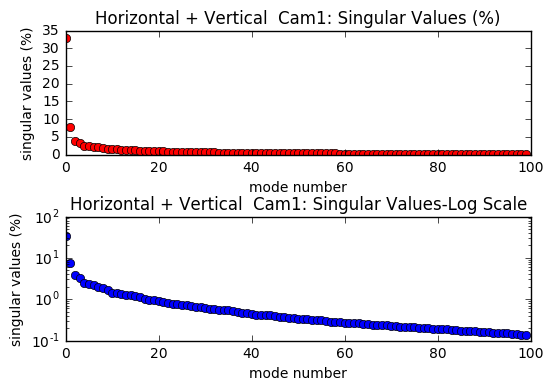

In [12]:
## Plot:
Lamda_cam1_p32_sorted = -np.sort(-Lamda_cam1_p32)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot((Lamda_cam1_p32_sorted/sum(Lamda_cam1_p32_sorted)*100),'ro')

plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Horizontal + Vertical  Cam1: Singular Values (%)")


plt.subplot(2,1,2)
plt.semilogy(Lamda_cam1_p32_sorted/sum(Lamda_cam1_p32_sorted)*100,'bo')
plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Horizontal + Vertical  Cam1: Singular Values-Log Scale")
plt.subplots_adjust(hspace=0.5)

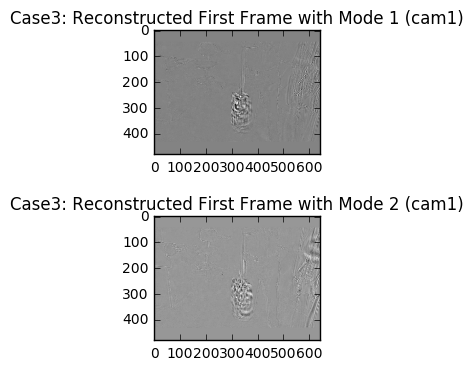

In [13]:
re_cam1_d1 = U_cam1_p32[:,0].reshape(IM_HEIGHT,IM_LENGTH)
re_cam1_d2 = U_cam1_p32[:,1].reshape(IM_HEIGHT,IM_LENGTH)
re_cam1_d3 = U_cam1_p32[:,2].reshape(IM_HEIGHT,IM_LENGTH)

plt.subplot(2,1,1)
plt.imshow(re_cam1_d1, 'gray')
plt.title("Case3: Reconstructed First Frame with Mode 1 (cam1)")

plt.subplot(2,1,2)
plt.imshow(re_cam1_d2, 'gray')
plt.title("Case3: Reconstructed First Frame with Mode 2 (cam1)")

plt.subplots_adjust(hspace=0.5)

### 2b) Cam2 Only

In [14]:
%%time
hd_cam2_matrix2 = [] 

col_curr = np.zeros((IM_LENGTH*IM_HEIGHT,1))
for i in range (0,NUM_FRAME):
    col_curr = hd_cam2_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 

    hd_cam2_matrix2.append(col_curr)

hd_cam2_matrix2 = np.transpose(np.asarray(hd_cam2_matrix2).squeeze())

hd_cam2_matrix2_scaled = preprocessing.scale(hd_cam2_matrix2) 

U_cam2_p32,Lamda_cam2_p32,V_s_cam2_p32 = sp.sparse.linalg.svds(hd_cam2_matrix2_scaled,k=100)

print(hd_cam2_matrix2.shape) 

C:\Users\Zhaokai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(307200, 226)
Wall time: 20.8 s


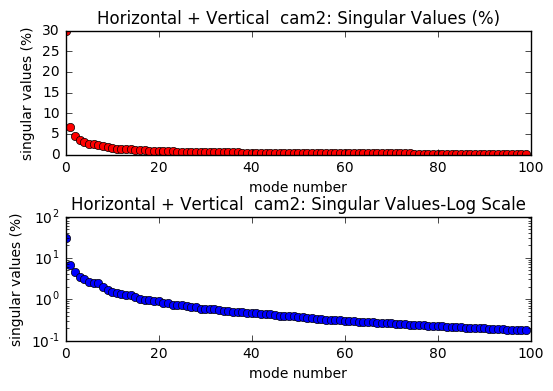

In [15]:
## Plot:
Lamda_cam2_p32_sorted = -np.sort(-Lamda_cam2_p32)
Lamda_cam2_p32_sorted_normed = preprocessing.scale(Lamda_cam2_p32_sorted) 

plt.figure(1)
plt.subplot(2,1,1)
plt.plot((Lamda_cam2_p32_sorted/sum(Lamda_cam2_p32_sorted)*100),'ro')

plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Horizontal + Vertical  cam2: Singular Values (%)")


plt.subplot(2,1,2)
plt.semilogy(Lamda_cam2_p32_sorted/sum(Lamda_cam2_p32_sorted)*100,'bo')
plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Horizontal + Vertical  cam2: Singular Values-Log Scale")
plt.subplots_adjust(hspace=0.5)

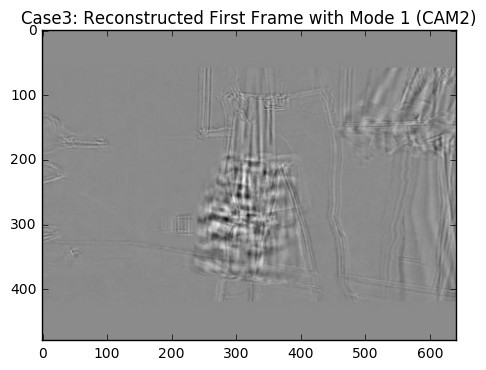

In [16]:
re_cam2_d1 = U_cam2_p32[:,0].reshape(IM_HEIGHT,IM_LENGTH)
re_cam2_d2 = U_cam2_p32[:,1].reshape(IM_HEIGHT,IM_LENGTH)
re_cam2_d3 = U_cam2_p32[:,2].reshape(IM_HEIGHT,IM_LENGTH)

plt.imshow(re_cam2_d1, 'gray')
plt.title("Case3: Reconstructed First Frame with Mode 1 (CAM2)")

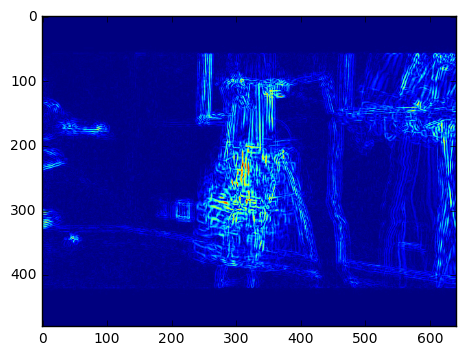

In [17]:
elevation_map = sobel(re_cam2_d1)
plt.imshow(elevation_map)

### 2c) Cam3

In [18]:
# %%time
hd_cam3_matrix2 = [] 

col_curr = np.zeros((IM_LENGTH*IM_HEIGHT,1))
for i in range (0,NUM_FRAME):
    col_curr = hd_cam3_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 

    hd_cam3_matrix2.append(col_curr)

hd_cam3_matrix2 = np.transpose(np.asarray(hd_cam3_matrix2).squeeze())

hd_cam3_matrix2_scaled = preprocessing.scale(hd_cam3_matrix2) 

U_cam3_p32,Lamda_cam3_p32,V_s_cam3_p32 = sp.sparse.linalg.svds(hd_cam3_matrix2_scaled,k=100)

print(hd_cam3_matrix2.shape) 

C:\Users\Zhaokai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(307200, 226)


In [19]:
print(Lamda_cam3_p32)

[   39.15072887    39.3078244     40.45647455    41.08570828    41.74950064
    42.28744859    42.97008765    43.32723122    43.64315833    44.83324731
    45.78443446    47.19658235    47.71933996    48.91612438    49.64438157
    50.24928314    51.62506145    52.36703024    53.83365248    54.29436836
    54.91371942    55.14509291    56.88291708    58.16233011    58.79304229
    59.31284814    59.81141821    61.05657528    61.81780434    62.70539484
    63.16510112    65.53299431    65.931296      66.87441722    68.01638105
    70.36558812    71.88410002    72.20898715    73.23474536    76.68786339
    77.65273239    78.72337532    80.29117023    80.80802146    83.02845126
    84.4254144     87.8547446     90.4854351     94.31396216    95.57389729
    98.54583036   100.29235882   101.00458354   104.1281713    106.20199903
   108.75012179   111.07356924   118.01647813   120.35511153   121.53168568
   127.54328457   132.25559034   135.08913906   138.43586856   143.21492625
   143.86336

In [20]:
print(Lamda_cam1_p32)

[   32.6293932     33.01601548    33.65290045    34.22615065    35.19023747
    35.9912533     36.19407155    37.07525964    37.552284      38.636203
    39.29325775    39.73186635    40.57641982    41.12438782    41.54966093
    43.17376843    43.36617601    44.06094124    45.76080808    45.97363466
    46.25704639    47.00755109    47.93538274    48.81261415    49.86332825
    50.67753072    51.18266064    51.76014473    53.07649132    53.66376511
    55.04630209    56.49193205    56.91436688    57.35566019    59.58286062
    60.04731717    61.52669979    61.66218699    63.37791099    64.68505983
    65.25816401    68.0510352     68.12234562    69.52882172    73.03629811
    74.25305474    76.1769159     78.06146657    79.71458221    80.56227204
    81.51413692    84.17611215    86.652832      90.05646391    92.88861789
    96.39336643    97.69949385    99.49938606   100.41138761   105.31065642
   108.67527957   109.99337955   115.85939209   124.49486321   129.04680851
   130.4361949

In [21]:
print(Lamda_cam2_p32)

[   45.3194404     45.56219856    46.26404303    46.35815635    46.77137034
    47.69095378    48.07502504    48.22807534    48.57705403    50.5020804
    50.90286447    51.69640436    51.97306199    52.73170884    53.78942397
    54.61380186    55.57289152    56.200003      56.95376559    57.10701164
    57.79442343    59.44754948    60.70792136    61.19024482    61.79406508
    62.59939688    63.31345186    63.94141903    64.49712535    66.77907946
    67.73998377    69.14399829    69.50647962    71.07535984    72.1427588
    73.39991662    74.4051021     75.82578428    77.36563375    77.84527276
    79.22085474    81.056505      81.56613582    82.77487143    84.01105981
    86.59922193    88.73847818    89.93961393    93.0891718     97.79514776
    98.67676573   101.37098476   101.70792006   103.0526925    106.36986366
   110.53152995   112.15925316   114.27562843   118.12310174   119.54341723
   122.09778471   123.98268048   126.53395937   129.36093022   132.27596109
   134.1579431

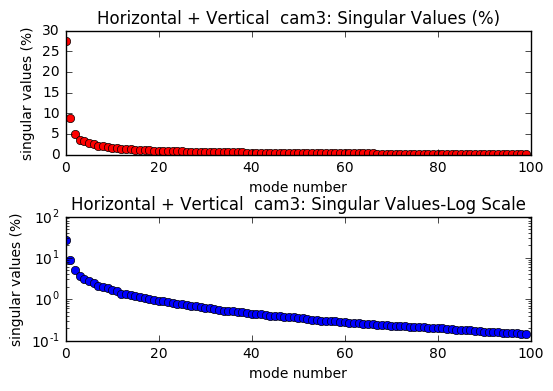

In [22]:
## Plot:
Lamda_cam3_p32_sorted = -np.sort(-Lamda_cam3_p32)
Lamda_cam3_p32_sorted_normed = preprocessing.scale(Lamda_cam3_p32_sorted) 

plt.figure(1)
plt.subplot(2,1,1)
plt.plot((Lamda_cam3_p32_sorted/sum(Lamda_cam3_p32_sorted)*100),'ro')

plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Horizontal + Vertical  cam3: Singular Values (%)")


plt.subplot(2,1,2)
plt.semilogy(Lamda_cam3_p32_sorted/sum(Lamda_cam3_p32_sorted)*100,'bo')
plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Horizontal + Vertical  cam3: Singular Values-Log Scale")
plt.subplots_adjust(hspace=0.5)

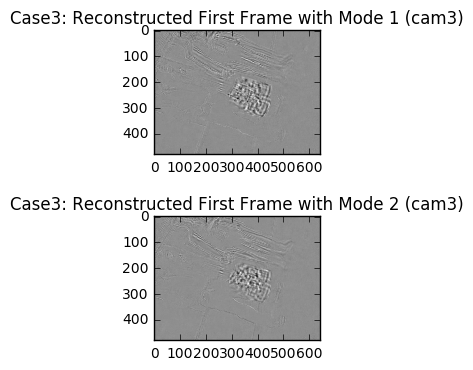

In [23]:
re_cam3_d1 = U_cam3_p32[:,0].reshape(IM_HEIGHT,IM_LENGTH)
re_cam3_d2 = U_cam3_p32[:,1].reshape(IM_HEIGHT,IM_LENGTH)
re_cam3_d3 = U_cam3_p32[:,2].reshape(IM_HEIGHT,IM_LENGTH)


# plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.imshow(re_cam3_d1, 'gray')
plt.title("Case3: Reconstructed First Frame with Mode 1 (cam3)")

plt.subplot(2,1,2)
plt.imshow(re_cam3_d2, 'gray')
plt.title("Case3: Reconstructed First Frame with Mode 2 (cam3)")
plt.subplots_adjust(hspace=0.5)

### C: Experimental Analysis

### C1) Magnitude (singular values) Comparison

In [24]:
cam123_matrix = np.zeros([307200,6])
cam123_matrix[:,0] = U_cam1_p32[:,0] * Lamda_cam1_p32[0]
cam123_matrix[:,1] = U_cam1_p32[:,1] * Lamda_cam1_p32[1]

cam123_matrix[:,2] = U_cam2_p32[:,0] * Lamda_cam2_p32[0]
cam123_matrix[:,3] = U_cam2_p32[:,1] * Lamda_cam2_p32[1]

cam123_matrix[:,4] = U_cam3_p32[:,0] * Lamda_cam3_p32[0]
cam123_matrix[:,5] = U_cam3_p32[:,1] * Lamda_cam3_p32[1]

U,Sigma,V_s = sp.sparse.linalg.svds(cam123_matrix,k=5)

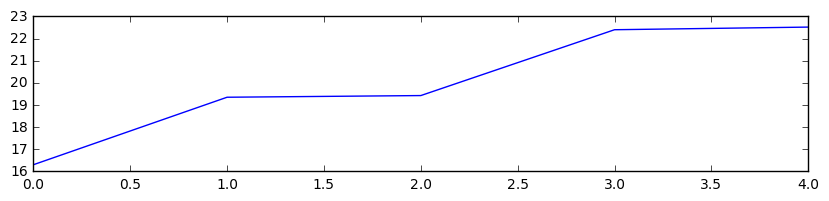

In [25]:
plt.figure(figsize=(10,2))

plt.plot(Sigma/sum(Sigma)*100,'b-')

[ 32.991071    39.16146214  39.31440122  45.33161933  45.57249813]


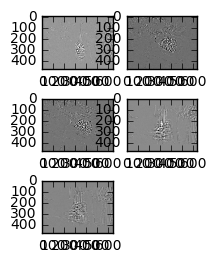

In [26]:
re_1 = U[:,0].reshape(IM_HEIGHT,IM_LENGTH)
re_2 = U[:,1].reshape(IM_HEIGHT,IM_LENGTH)
re_3 = U[:,2].reshape(IM_HEIGHT,IM_LENGTH)
re_4 = U[:,3].reshape(IM_HEIGHT,IM_LENGTH)
re_5 = U[:,4].reshape(IM_HEIGHT,IM_LENGTH)

plt.figure(figsize=(2,3))
plt.subplot(3,2,1)
plt.imshow(re_1,'gray')

plt.subplot(3,2,2)
plt.imshow(re_2,'gray')

plt.subplot(3,2,3)
plt.imshow(re_3,'gray')

plt.subplot(3,2,4)
plt.imshow(re_4,'gray')

plt.subplot(3,2,5)
plt.imshow(re_5,'gray')

print(Sigma)

### C2) Motion Capture: Cam2_mode1

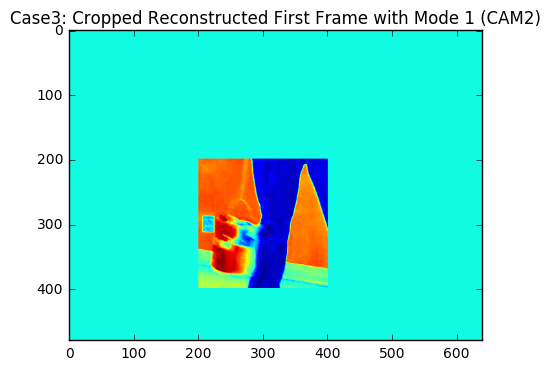

In [27]:
##
#2D mask to 1D mask 

reconstructed_hd_cam2 = np.dot(U_cam2_p32,np.dot(np.diag(Lamda_cam2_p32),V_s_cam2_p32))

mask_2d = np.zeros([IM_HEIGHT,IM_LENGTH])
for i in range (200,400):
    for j in range (200,400):
        mask_2d[i,j] = 1
        
mask_1d = mask_2d.reshape(IM_HEIGHT*IM_LENGTH,1)
index_mask_1d = np.asarray(np.where(mask_1d == 1)[0])



## Cropping
frame1 = reconstructed_hd_cam2[:,0]
cropped_frame1 = np.zeros_like(frame1)

for i in index_mask_1d:
    cropped_frame1[i] = frame1[i]
plt.imshow(cropped_frame1.reshape(IM_HEIGHT,IM_LENGTH))    
plt.title("Case3: Cropped Reconstructed First Frame with Mode 1 (CAM2)")

In [28]:
# %%time
cropped_images = []
markers = []
for i in range(0,NUM_FRAME):
    curr_frame = reconstructed_hd_cam2[:,i]
    curr_cropped_frame = np.zeros_like(curr_frame)
    
    for j in index_mask_1d:
        curr_cropped_frame[j] = curr_frame[j]
    
    curr_max_pixel = np.amax(curr_cropped_frame)
    curr_marker = np.where(curr_cropped_frame.reshape(IM_HEIGHT,IM_LENGTH) == curr_max_pixel)
    curr_marker_2d = np.asarray(curr_marker).squeeze().reshape(2,1)
    
    
    markers.append(curr_marker_2d)
    
markers = np.transpose(np.asarray(markers).squeeze())
print(markers.shape)

(2, 226)


Horizontal Movement Variance:  2083.72480226
Vertical Movemrnt Variance:  808.856468792


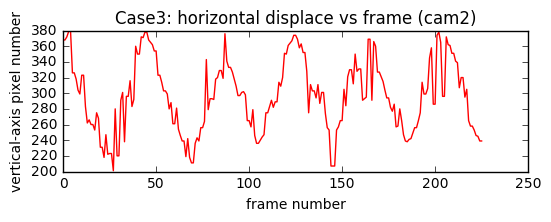

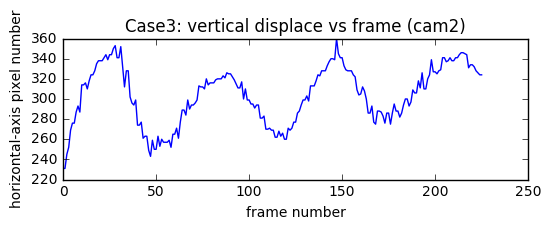

In [29]:
x = markers[0,:]
y = markers[1,:]
n = np.arange(NUM_FRAME)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(n,x,'r')

plt.title('Case3: horizontal displace vs frame (cam2)') 
plt.xlabel('frame number')
plt.ylabel('vertical-axis pixel number')


plt.figure(2)
plt.subplot(2,1,2)
plt.plot(n,y,'b')
plt.title('Case3: vertical displace vs frame (cam2)') 
plt.xlabel('frame number')
plt.ylabel('horizontal-axis pixel number')


print("Horizontal Movement Variance: ", np.var(x))
print("Vertical Movemrnt Variance: ", np.var(y))


In [30]:
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure()
# ax = plt.axes(xlim=(200, 400), ylim=(200, 400))
# line, = ax.plot([], [], 'ro')

# # initialization function: plot the background of each frame
# def init():
#     line.set_data([], [])
#     return line,

# # animation function.  This is called sequentially
# def animate(i):
#     x_curr = x[i]
#     y_curr = y[i]
#     line.set_data(x_curr, y_curr)
#     return line,

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=200, interval=50, blit=True)

# anim.save('hdr_movement.mp4', fps=1, extra_args=['-vcodec', 'libx264'])